In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.decomposition import PCA

In [13]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#print(data.target)
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Task 1

Text(0, 0.5, 'PCA Component 2')

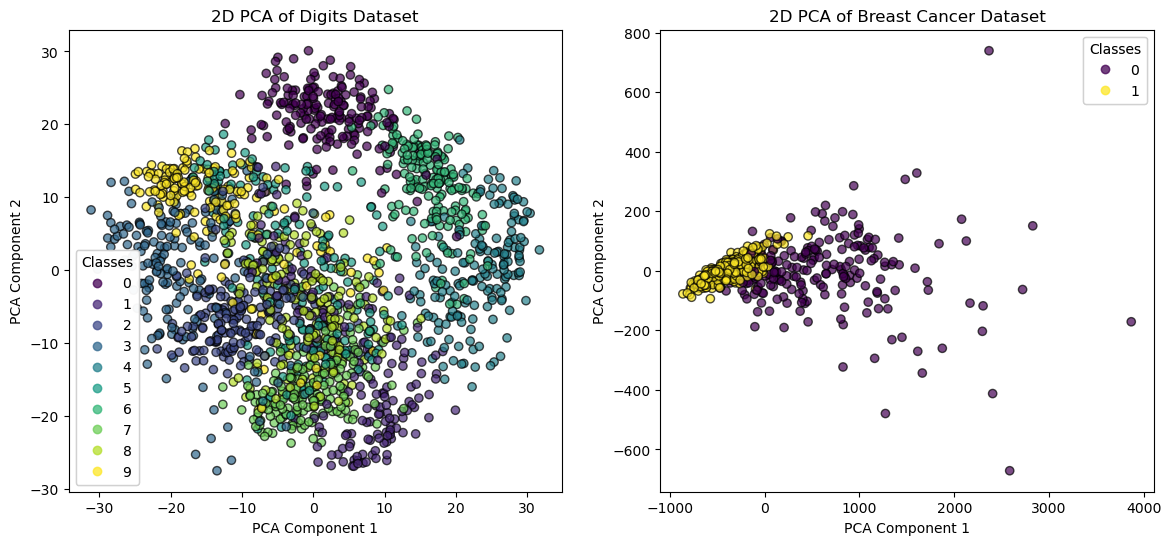

In [3]:
# Load datasets
digits = load_digits()
breast_cancer = load_breast_cancer()

# Extract features and labels
digits_data = digits.data
digits_labels = digits.target

breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target

# Apply PCA to reduce to 2D
pca_digits = PCA(n_components=2)
digits_2d = pca_digits.fit_transform(digits_data)

pca_breast_cancer = PCA(n_components=2)
breast_cancer_2d = pca_breast_cancer.fit_transform(breast_cancer_data)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Digits dataset
scatter = ax[0].scatter(digits_2d[:, 0], digits_2d[:, 1], c=digits_labels, cmap='viridis', edgecolor='k', alpha=0.7)
legend1 = ax[0].legend(*scatter.legend_elements(), title="Classes")
ax[0].add_artist(legend1)
ax[0].set_title('2D PCA of Digits Dataset')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

# Breast Cancer dataset
scatter = ax[1].scatter(breast_cancer_2d[:, 0], breast_cancer_2d[:, 1], c=breast_cancer_labels, cmap='viridis', edgecolor='k', alpha=0.7)
legend1 = ax[1].legend(*scatter.legend_elements(), title="Classes")
ax[1].add_artist(legend1)
ax[1].set_title('2D PCA of Breast Cancer Dataset')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')

#plt.show()
#plt.savefig("breast.png")

## Task 2

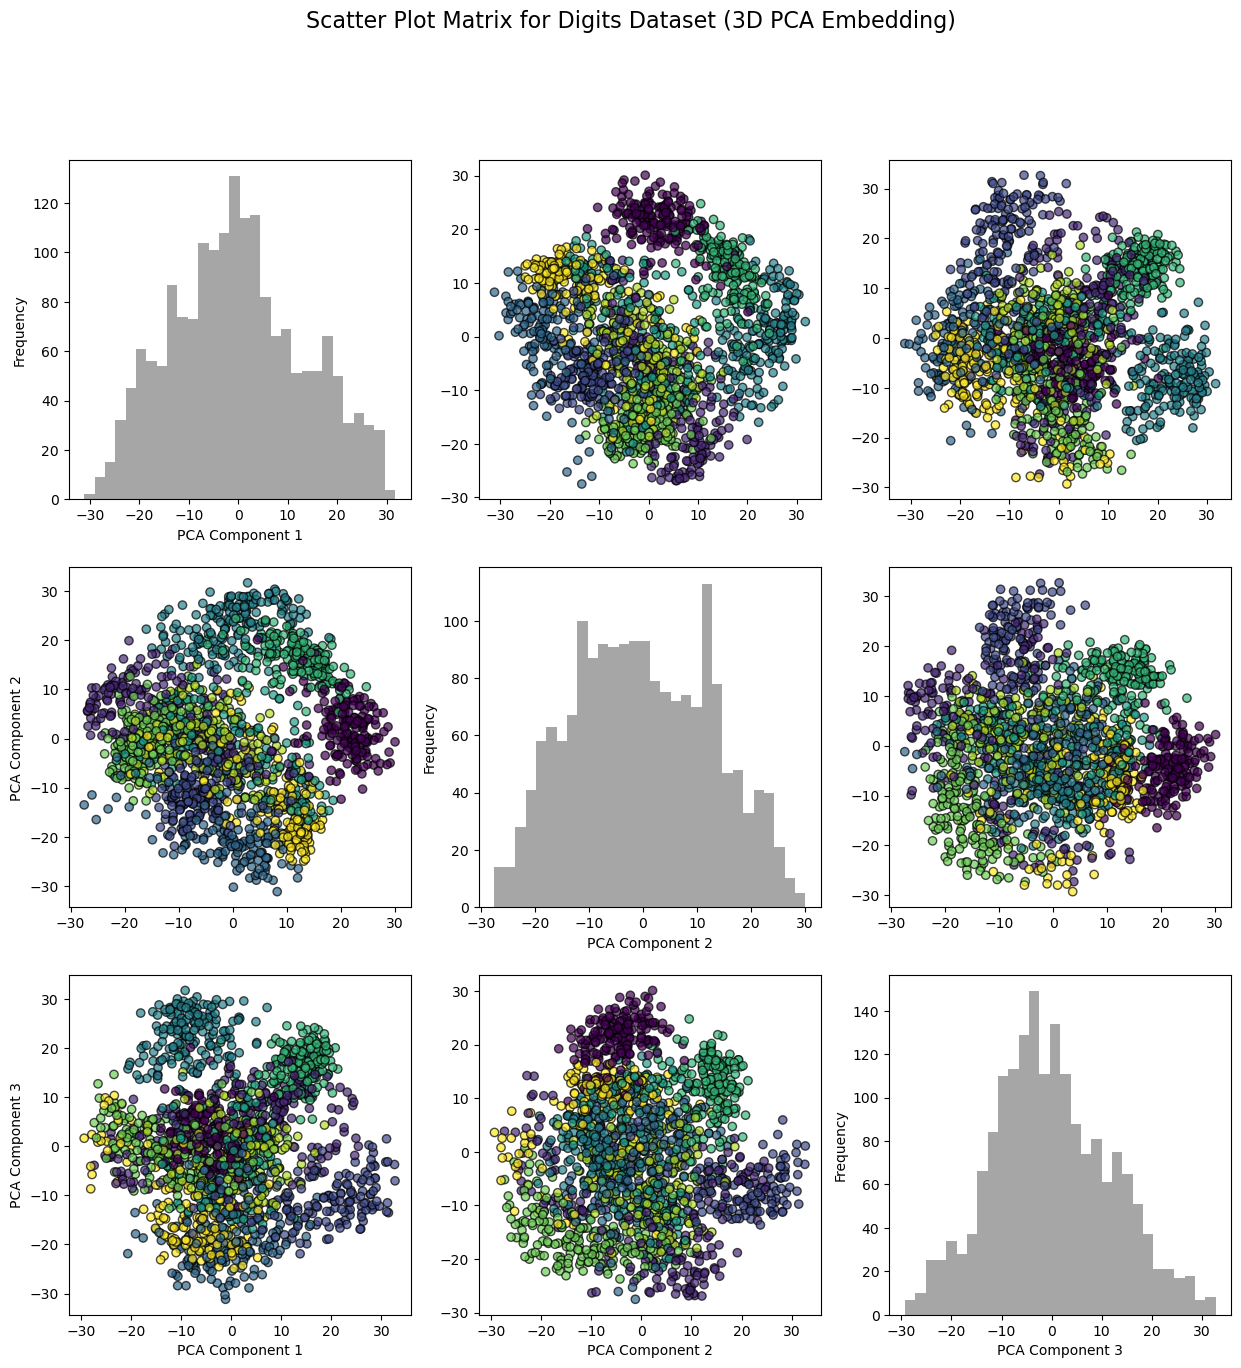

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.decomposition import PCA

def scatter_plot_matrix_3d(data, labels, dataset_name):
    pca = PCA(n_components=3)
    data_3d = pca.fit_transform(data)
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Scatter Plot Matrix for {dataset_name} Dataset (3D PCA Embedding)', fontsize=16)
    
    components = ['PCA Component 1', 'PCA Component 2', 'PCA Component 3']
    
    for i in range(3):
        for j in range(3):
            if i == j:
                axes[i, j].hist(data_3d[:, i], bins=30, color='gray', alpha=0.7)
                axes[i, j].set_xlabel(components[i])
                axes[i, j].set_ylabel('Frequency')
            else:
                scatter = axes[i, j].scatter(data_3d[:, i], data_3d[:, j], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
                if i == 2:
                    axes[i, j].set_xlabel(components[j])
                if j == 0:
                    axes[i, j].set_ylabel(components[i])
                if i == 2 and j == 2:
                    handles, legend_labels = scatter.legend_elements()
                    legend = fig.legend(handles, [label for label in legend_labels], title="Classes", loc='upper right')
    
    plt.show()

# Load datasets
digits = load_digits()
breast_cancer = load_breast_cancer()

# Extract features and labels
digits_data = digits.data
digits_labels = digits.target

breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target

# Visualize scatter plot matrix for both datasets
scatter_plot_matrix_3d(digits_data, digits_labels, 'Digits')
#plt.savefig("digits3d.png")
#scatter_plot_matrix_3d(breast_cancer_data, breast_cancer_labels, 'Breast Cancer')


## Task 3

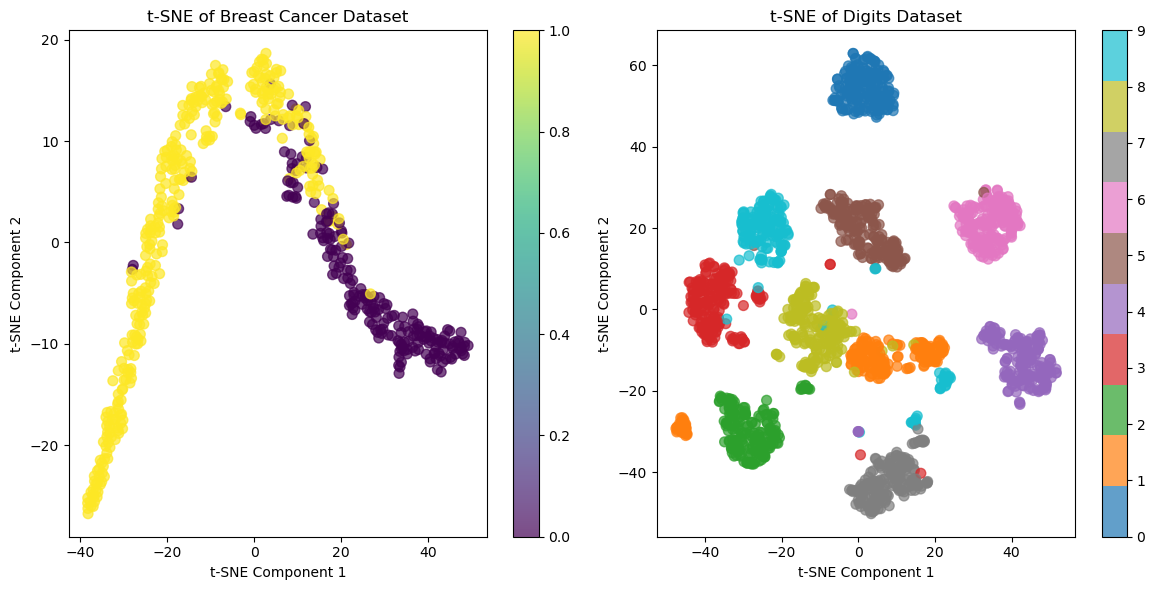

In [5]:
#for default values
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.manifold import TSNE

# Load datasets
cancer_data = load_breast_cancer()
digits_data = load_digits()

# Perform t-SNE on breast cancer dataset
tsne_cancer = TSNE(n_components=2, random_state=42)
cancer_tsne_results = tsne_cancer.fit_transform(cancer_data.data)

# Perform t-SNE on digits dataset
tsne_digits = TSNE(n_components=2, random_state=42)
digits_tsne_results = tsne_digits.fit_transform(digits_data.data)

# Plot t-SNE results for breast cancer dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(cancer_tsne_results[:, 0], cancer_tsne_results[:, 1], c=cancer_data.target, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.title('t-SNE of Breast Cancer Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Plot t-SNE results for digits dataset
plt.subplot(1, 2, 2)
plt.scatter(digits_tsne_results[:, 0], digits_tsne_results[:, 1], c=digits_data.target, cmap='tab10', s=50, alpha=0.7)
plt.colorbar()
plt.title('t-SNE of Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


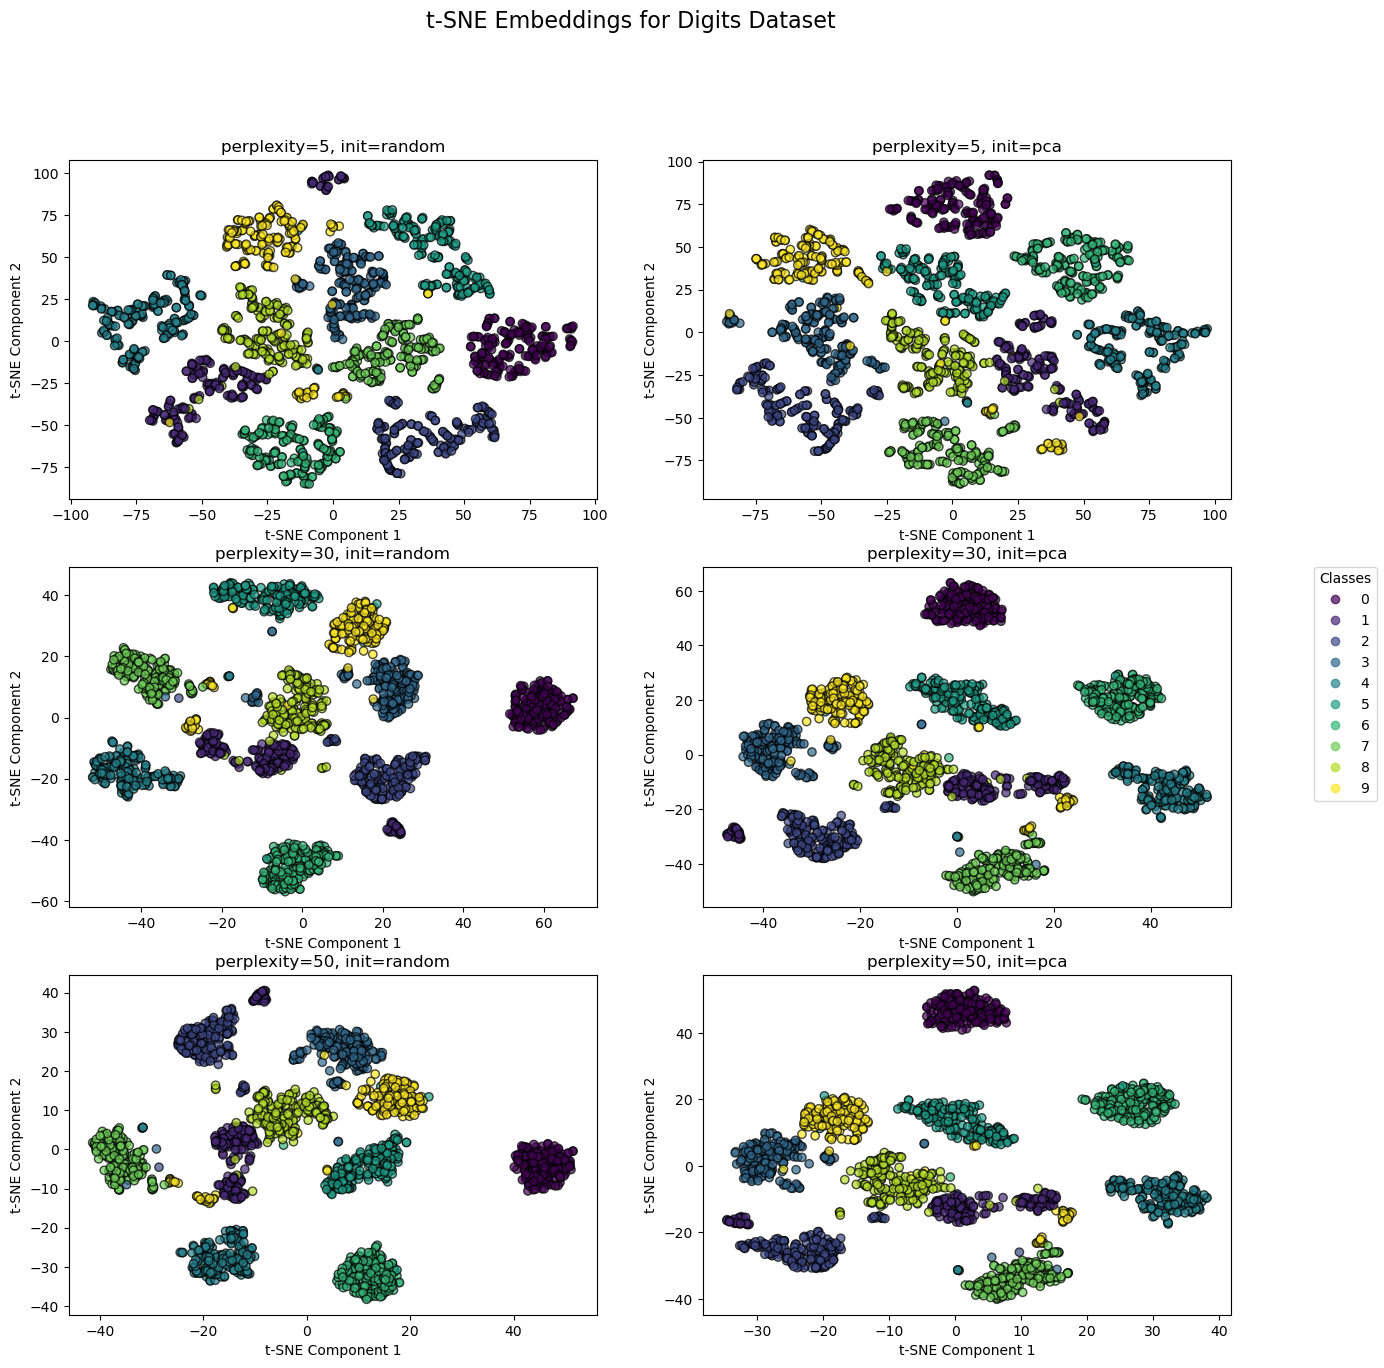

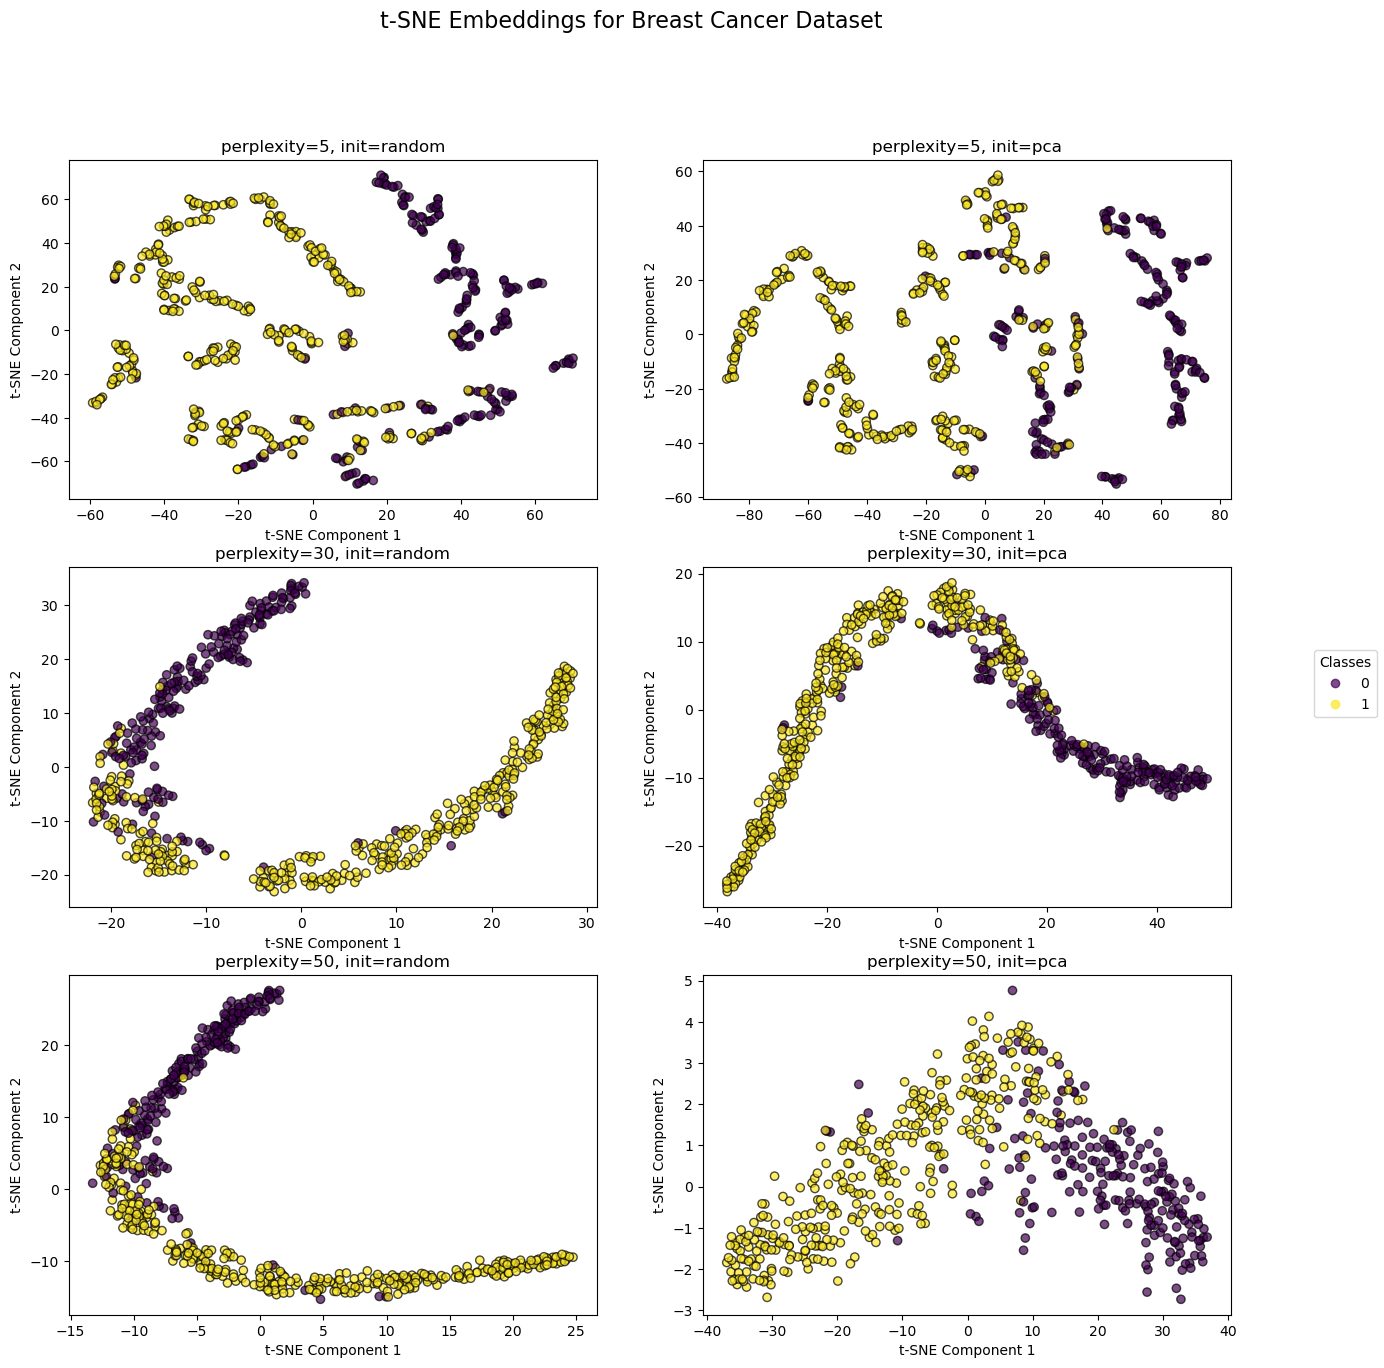

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.manifold import TSNE

def plot_tsne_embeddings(data, labels, dataset_name, perplexities, inits):
    fig, axes = plt.subplots(len(perplexities), len(inits), figsize=(15, 15))
    fig.suptitle(f't-SNE Embeddings for {dataset_name} Dataset', fontsize=16)
    
    for i, perplexity in enumerate(perplexities):
        for j, init in enumerate(inits):
            tsne = TSNE(n_components=2, perplexity=perplexity, init=init, random_state=42)
            embedding = tsne.fit_transform(data)
            
            ax = axes[i, j]
            scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
            ax.set_title(f'perplexity={perplexity}, init={init}')
            ax.set_xlabel('t-SNE Component 1')
            ax.set_ylabel('t-SNE Component 2')
    
    handles, legend_labels = scatter.legend_elements()
    fig.legend(handles, [label for label in legend_labels], title="Classes", loc='center right')
    
    plt.show()

# Load datasets
digits = load_digits()
breast_cancer = load_breast_cancer()

# Extract features and labels
digits_data = digits.data
digits_labels = digits.target

breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target

# Define parameters
perplexities = [5, 30, 50]
inits = ['random', 'pca']

# Visualize t-SNE embeddings
plot_tsne_embeddings(digits_data, digits_labels, 'Digits', perplexities, inits)
plot_tsne_embeddings(breast_cancer_data, breast_cancer_labels, 'Breast Cancer', perplexities, inits)


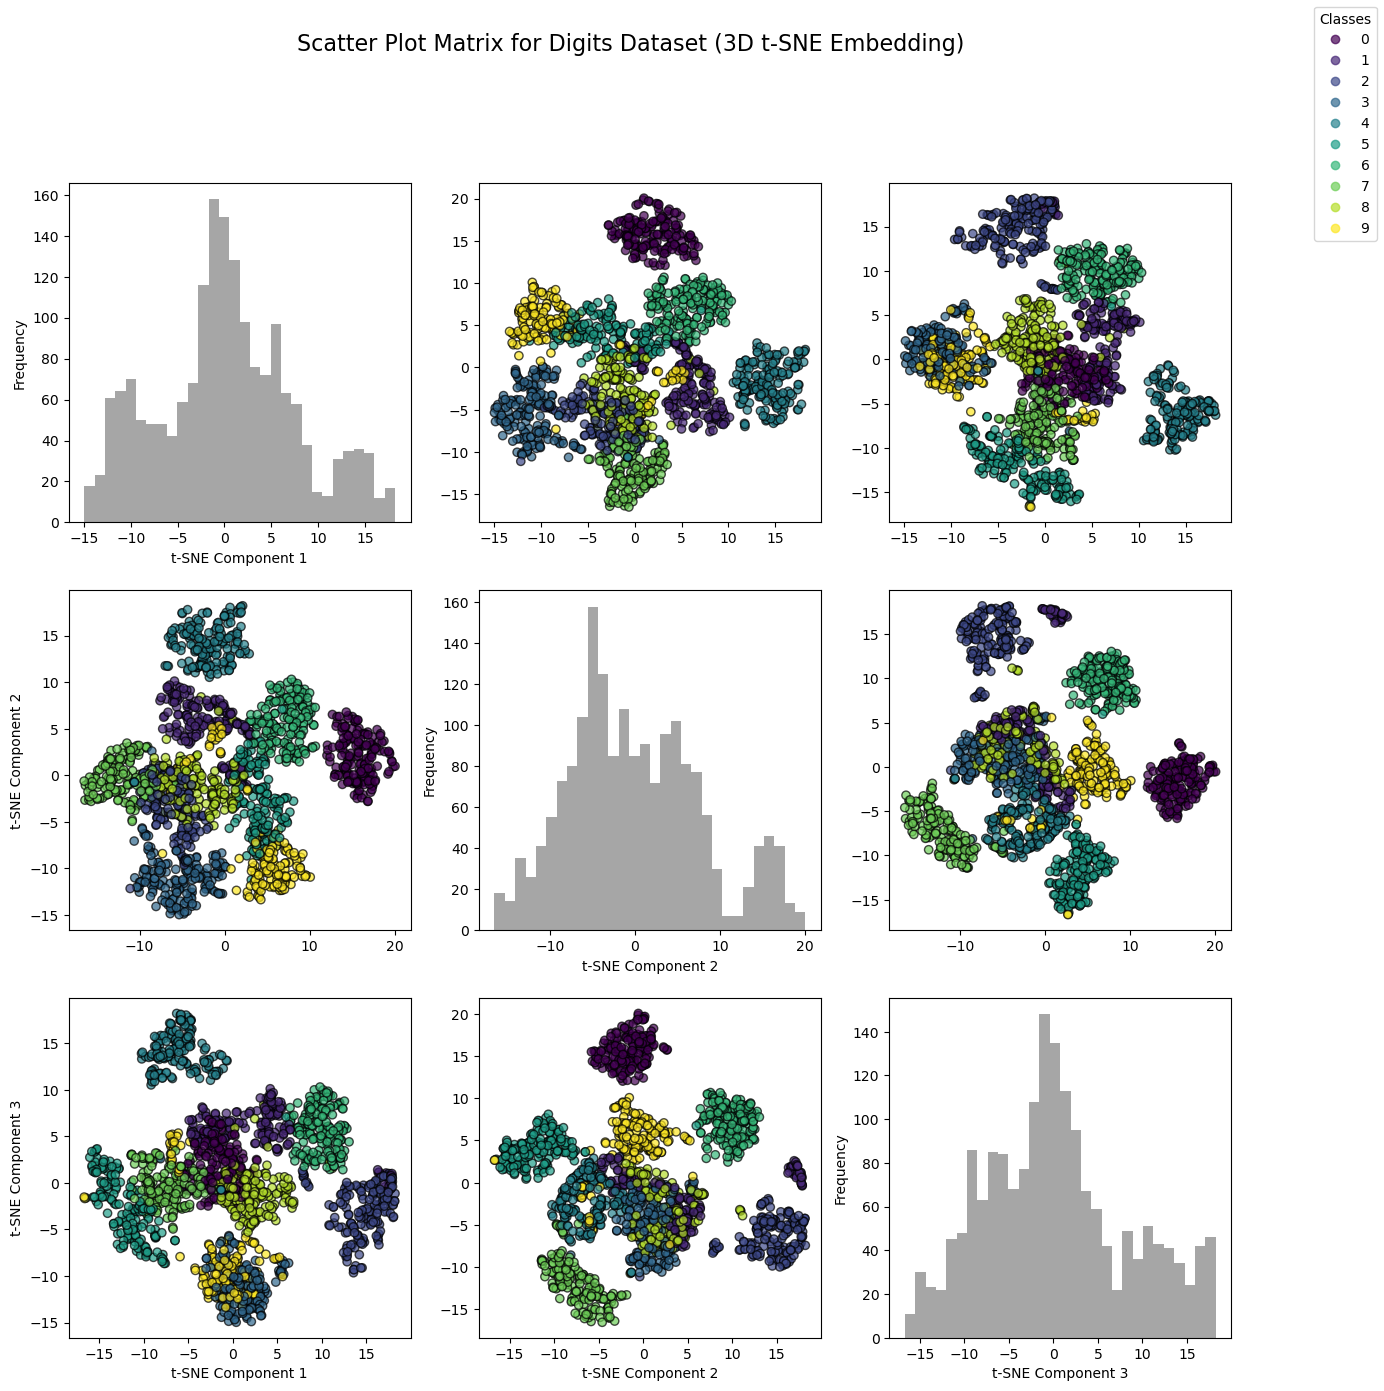

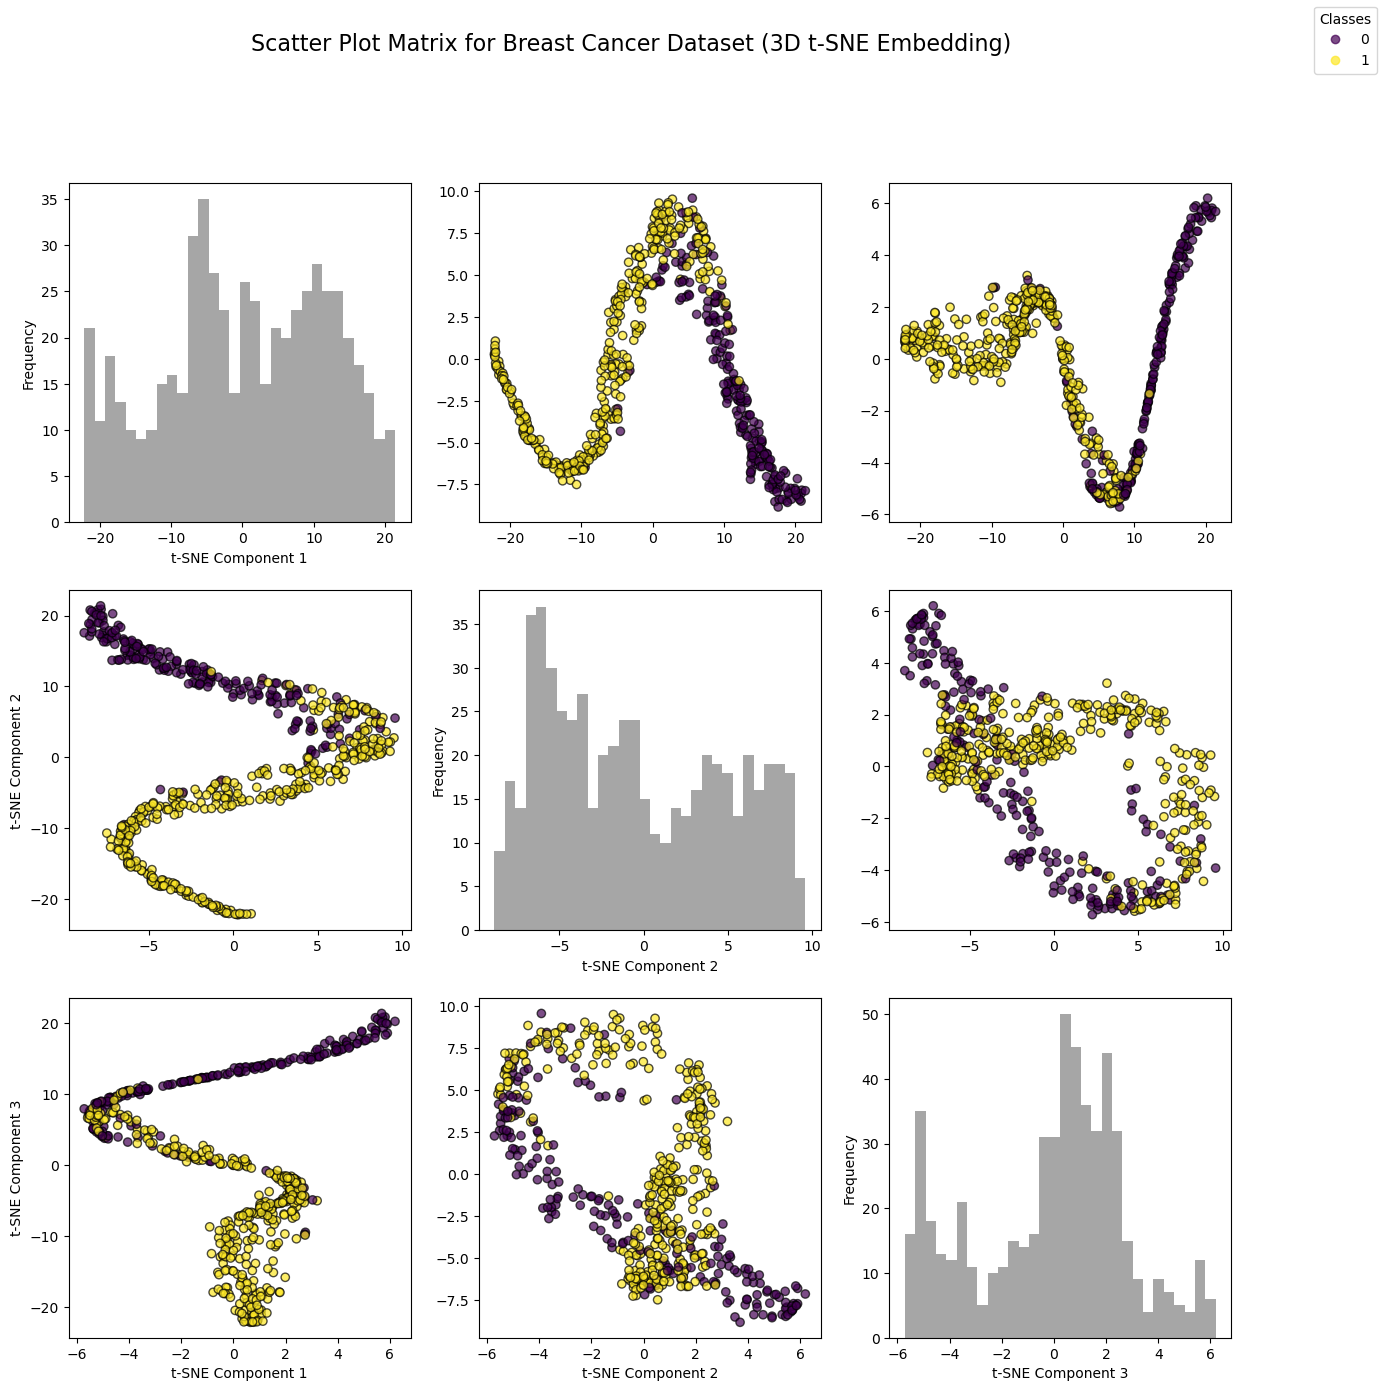

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.manifold import TSNE

def scatter_plot_matrix_3d_tsne(data, labels, dataset_name):
    tsne = TSNE(n_components=3, random_state=42)
    data_3d = tsne.fit_transform(data)
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Scatter Plot Matrix for {dataset_name} Dataset (3D t-SNE Embedding)', fontsize=16)
    
    components = ['t-SNE Component 1', 't-SNE Component 2', 't-SNE Component 3']
    
    for i in range(3):
        for j in range(3):
            if i == j:
                axes[i, j].hist(data_3d[:, i], bins=30, color='gray', alpha=0.7)
                axes[i, j].set_xlabel(components[i])
                axes[i, j].set_ylabel('Frequency')
            else:
                scatter = axes[i, j].scatter(data_3d[:, i], data_3d[:, j], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
                if i == 2:
                    axes[i, j].set_xlabel(components[j])
                if j == 0:
                    axes[i, j].set_ylabel(components[i])
    
    handles, legend_labels = scatter.legend_elements()
    fig.legend(handles, [label for label in legend_labels], title="Classes", loc='upper right')
    
    plt.show()

# Load datasets
digits = load_digits()
breast_cancer = load_breast_cancer()

# Extract features and labels
digits_data = digits.data
digits_labels = digits.target

breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target

# Visualize scatter plot matrix for both datasets
scatter_plot_matrix_3d_tsne(digits_data, digits_labels, 'Digits')
scatter_plot_matrix_3d_tsne(breast_cancer_data, breast_cancer_labels, 'Breast Cancer')


## Task 4

In [11]:
#intsllting umap-learn
#!pip install umap-learn

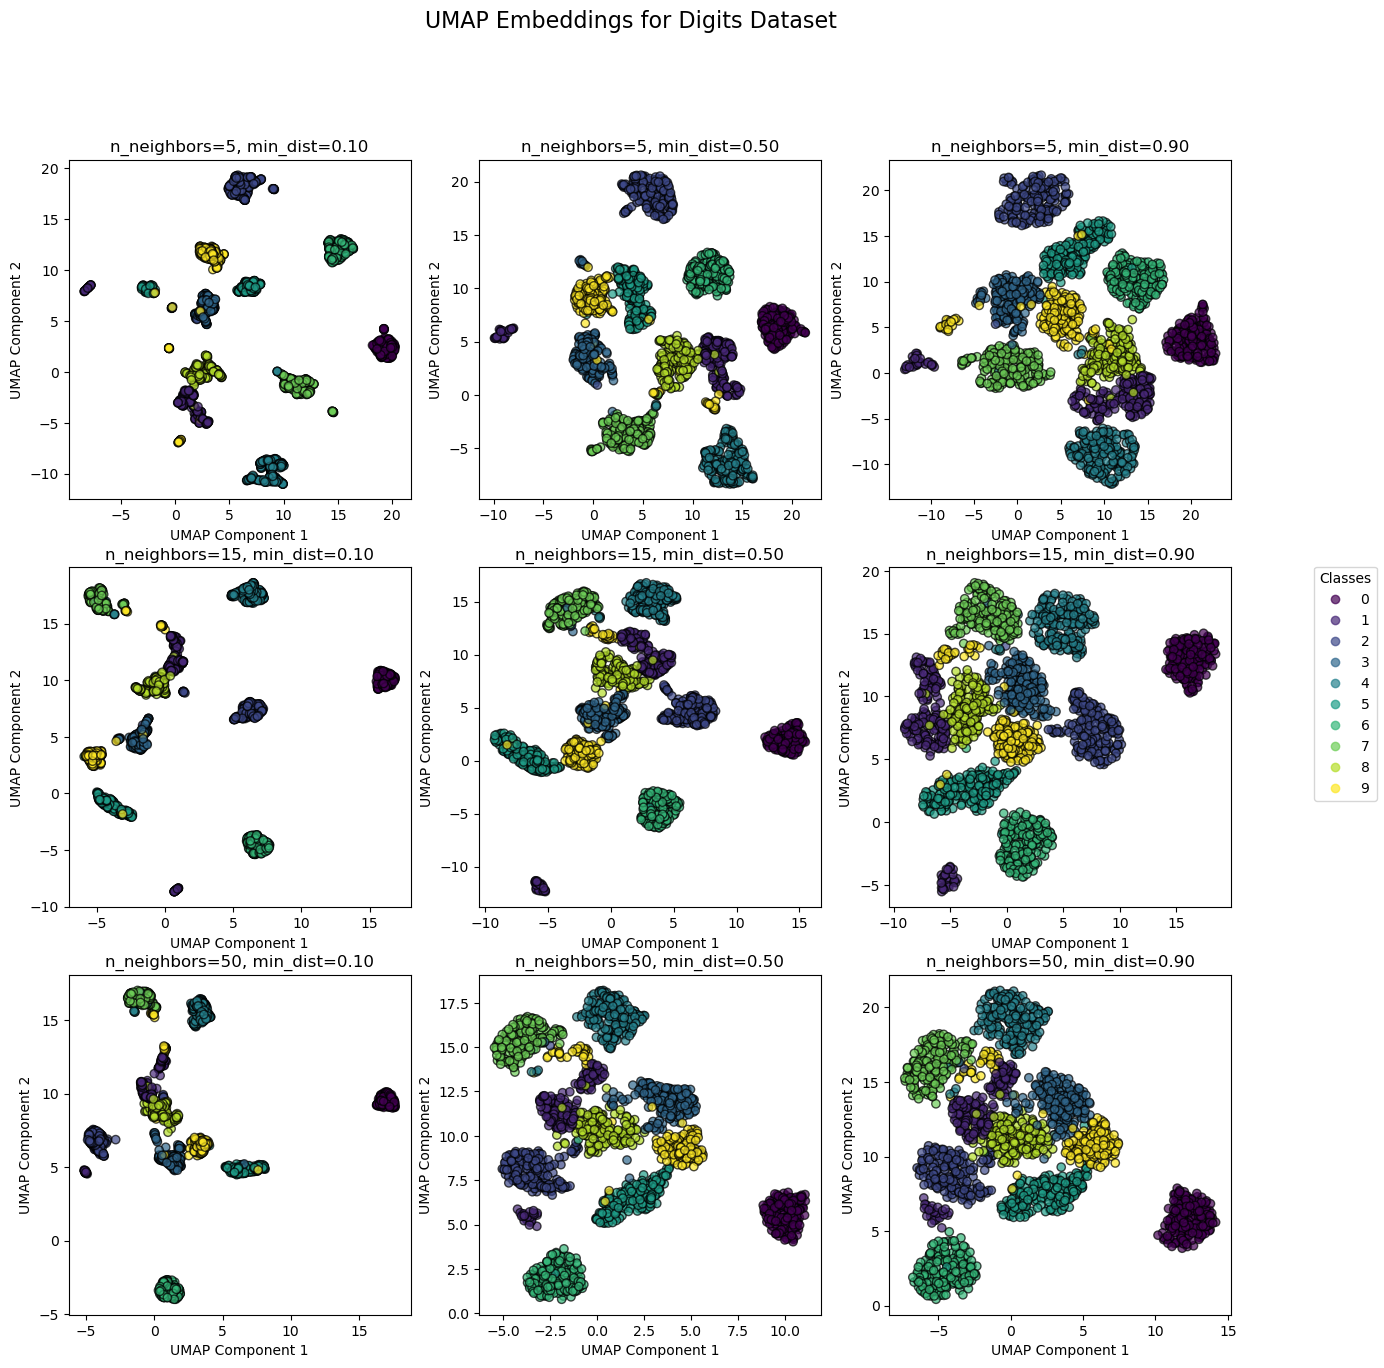

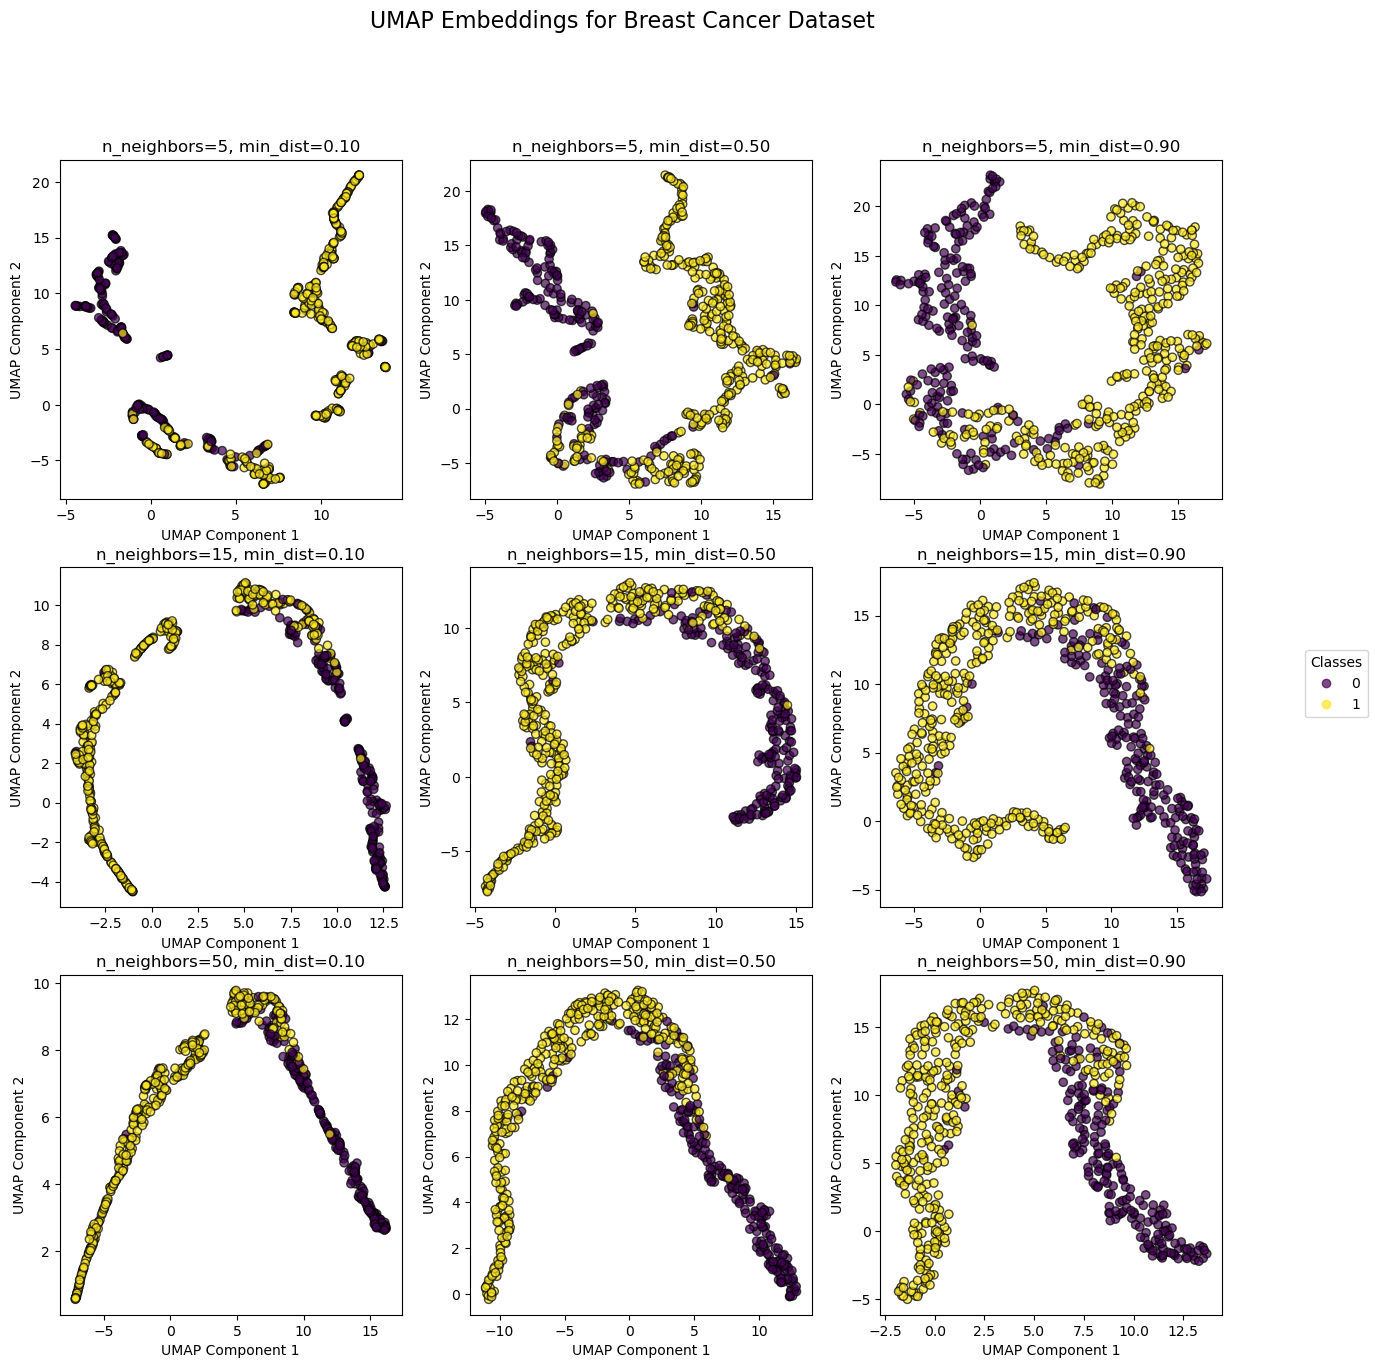

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_breast_cancer
import umap
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="umap")

def plot_umap_embeddings(data, labels, dataset_name, n_neighbors_list, min_dist_list):
    fig, axes = plt.subplots(len(n_neighbors_list), len(min_dist_list), figsize=(15, 15))
    fig.suptitle(f'UMAP Embeddings for {dataset_name} Dataset', fontsize=16)
    
    for i, n_neighbors in enumerate(n_neighbors_list):
        for j, min_dist in enumerate(min_dist_list):
            reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
            embedding = reducer.fit_transform(data)
            
            ax = axes[i, j]
            scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
            ax.set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist:.2f}')
            ax.set_xlabel('UMAP Component 1')
            ax.set_ylabel('UMAP Component 2')
    
    handles, legend_labels = scatter.legend_elements()
    fig.legend(handles, [label for label in legend_labels], title="Classes", loc='center right')
    
    plt.show()

# Load datasets
digits = load_digits()
breast_cancer = load_breast_cancer()

# Extract features and labels
digits_data = digits.data
digits_labels = digits.target

breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target

# Define parameters
n_neighbors_list = [5, 15, 50]
min_dist_list = [0.1, 0.5, 0.9]

# Visualize UMAP embeddings
plot_umap_embeddings(digits_data, digits_labels, 'Digits', n_neighbors_list, min_dist_list)
plot_umap_embeddings(breast_cancer_data, breast_cancer_labels, 'Breast Cancer', n_neighbors_list, min_dist_list)
